<a href="https://colab.research.google.com/github/piyushjain220/TSAI/blob/main/Edu/Module5/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing The Packages

In [ ]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import os
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import PIL.Image as Image
from torchvision import datasets,models
import matplotlib.pyplot as plt
from torch.autograd import Variable
import warnings
warnings.filterwarnings("ignore")

# Converting the Folders into dataset

In [ ]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'validation':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
}

        
        

In [ ]:
input_path='../input/cat-and-dog'
data_image={
    'train': datasets.ImageFolder(input_path+'/training_set/'+'training_set',data_transforms['train'])
    , 'test':datasets.ImageFolder(input_path+'/test_set/'+'test_set',data_transforms['validation'])
    
    
}

# Making Train and Validation Loader

In [ ]:
train_loader=torch.utils.data.DataLoader(data_image['train'],
                                batch_size=1,
                                shuffle=True,
                                num_workers=0)

In [ ]:
validation_loader=torch.utils.data.DataLoader(data_image['test'],
                                batch_size=1,
                                shuffle=True,
                                num_workers=0)

In [ ]:
def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

training images
tensor(1)
torch.Size([3, 224, 224])


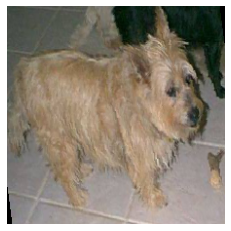

In [ ]:
trainimages, trainlabels = next(iter(train_loader))

print('training images')

imshow(trainimages[0])
print(trainlabels[0])

print(trainimages[0].size())

# Checking if there is GPU

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

# Making the Neural Network

In [ ]:
# Creating the CNN neural network
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1=nn.Conv2d(3,6,3)
        self.conv2=nn.Conv2d(6,16,3)
        self.f1=nn.Linear(16*54*54,2)     

    def forward(self,x):
        x=torch.tensor(x,dtype=self.conv1.weight.dtype)
        x=F.max_pool2d(self.conv1(x),(2,2))
        x=F.max_pool2d(self.conv2(x),2)
        x=x.view(-1,self.get_size(x))
        x=self.f1(x)
        return x
    def get_size(self,x):
        nn=1
        ps=x.size()[1:]
        for i in ps:
            nn*=i
        return nn

In [ ]:
cnn=CNN()
cnn=cnn.to(device)

In [ ]:
# Cross Entropy Loss  
error = nn.CrossEntropyLoss()

# SGD Optimizer 
learning_rate = 0.001
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

In [ ]:
batch_size=1
n_iters = 10000
num_epochs = n_iters / (8005 / batch_size)
num_epochs = int(num_epochs)

# Training The Model

In [ ]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
accuracy_list=[]
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Define variables
        train = Variable(images.view(1, 3,224,224)).to(device)
        labels = Variable(labels).to(device)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = cnn(train)
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in validation_loader: 
                test = Variable(images.view(1,3,224,224)).to(device)
                labels=Variable(labels).to(device)
                
                # Forward propagation
                outputs = cnn(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.75621098279953  Accuracy: 55.26445770263672%
Iteration: 1000  Loss: 1.3078936338424683  Accuracy: 55.412750244140625%
Iteration: 1500  Loss: 0.20172789692878723  Accuracy: 61.04794692993164%
Iteration: 2000  Loss: 0.45522749423980713  Accuracy: 52.89174270629883%
Iteration: 2500  Loss: 1.558857798576355  Accuracy: 55.857635498046875%
Iteration: 3000  Loss: 0.7917718291282654  Accuracy: 54.62184524536133%
Iteration: 3500  Loss: 0.015238413587212563  Accuracy: 47.45427322387695%
Iteration: 4000  Loss: 0.3309735059738159  Accuracy: 59.0212516784668%
Iteration: 4500  Loss: 0.7799131870269775  Accuracy: 60.80078887939453%
Iteration: 5000  Loss: 1.1682647466659546  Accuracy: 53.9792366027832%
Iteration: 5500  Loss: 0.18892619013786316  Accuracy: 59.21897888183594%
Iteration: 6000  Loss: 0.5445294380187988  Accuracy: 49.382102966308594%
Iteration: 6500  Loss: 2.222113609313965  Accuracy: 59.367271423339844%
Iteration: 7000  Loss: 0.09842224419116974  Accuracy: 58.13148

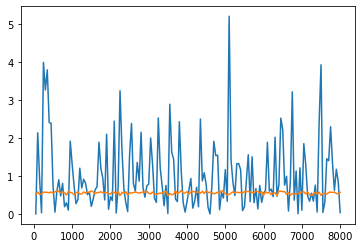

In [ ]:
plt.plot(iteration_list,loss_list)
plt.plot(iteration_list,np.array(accuracy_list)/100)

# Predicting some of the data

It's a dog


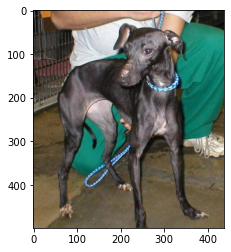

In [ ]:
catty=Image.open('../input/cat-and-dog/test_set/test_set/dogs/dog.4004.jpg')
plt.imshow(Image.open('../input/cat-and-dog/test_set/test_set/dogs/dog.4004.jpg'))
catty=catty.resize((224,224),resample=0)
val=np.array(catty).astype(float)
val=torch.from_numpy(val).cuda()
if torch.max(cnn(val.view(1,3,224,224)).data, 1)[1]==0 :
    print("It's a cat")
else:
    print("It's a dog")

It's a dog


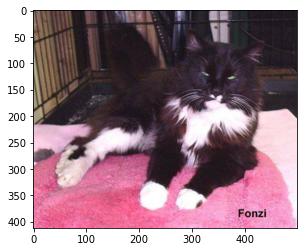

In [ ]:
catty=Image.open('../input/cat-and-dog/test_set/test_set/cats/cat.4010.jpg')
plt.imshow(Image.open('../input/cat-and-dog/test_set/test_set/cats/cat.4010.jpg'))
catty=catty.resize((224,224),resample=0)
val=np.array(catty).astype(float)
val=torch.from_numpy(val).cuda()
if torch.max(cnn(val.view(1,3,224,224)).data, 1)[1]==0 :
    print("It's a cat")
else:
    print("It's a dog")